<a href="https://colab.research.google.com/github/AnishaA-git/AirBnB-Dataset-Preparation-cleaning/blob/master/HW_1_airbnb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb NYC Listings Data Analysis

Dataset describes the Airbnb listing activity and metrics in NYC, NY for 2019. It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

In [539]:
!pip install haversine
!pip install -U pandas-profiling

In [540]:
import numpy as np
import pandas as pd
import pandas_profiling

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [542]:
%matplotlib inline

In [543]:
filename = "https://raw.githubusercontent.com/AnishaA-git/AirBnB-Dataset-Preparation-cleaning/master/AB_NYC_2019_1.csv"
nyc_df = pd.read_csv(filename, sep=',', nrows=48896)
nyc_df

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48853  36484665  ...                9
48854  36485057  ...               36
48855  36485431  ...               27
48856  36485609  ...                2
48857  36487245  ...               23

[48858 rows x 16 columns]

In [544]:
nyc_df.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

Based on the raw data provided we can explore the following questions:
- Which neighbourhoods are the most/least expensive?
- What is the average price for listings in each listing?
- Which neighbourhoods are the most/least reviewed?
- What types of rooms are most popular?

# Data Cleaning and Preparation

In this stage the data is checked for accuracy and completeness prior to beginning the analysis. 

- Removing extraneous data and outliers.
- Filling in missing values.
- Conforming data to a standardized pattern.
- Identifying errors revealed when new variables are created.
- Deleting data that cannot be corrected.

## Removing Outliers

In [551]:
nyc_df= nyc_df.drop(nyc_df[(nyc_df['minimum_nights']>365)].index)
nyc_df= nyc_df.drop(nyc_df[(nyc_df['number_of_reviews']>500)].index)
nyc_df= nyc_df.drop(nyc_df[(nyc_df['calculated_host_listings_count']>100)].index)
nyc_df= nyc_df.drop(nyc_df[(nyc_df['price']>1800)].index)
nyc_df= nyc_df.drop(nyc_df[(nyc_df['price']<1)].index)

nyc_df.describe()

id  ...  availability_365
count  4.792600e+04  ...      47926.000000
mean   1.886182e+07  ...        109.879856
std    1.095189e+07  ...        130.393759
min    2.539000e+03  ...          0.000000
25%    9.386073e+06  ...          0.000000
50%    1.947509e+07  ...         41.000000
75%    2.883438e+07  ...        217.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

## Steps performed in OpenRefine

The name, host_name, last_review and reviews_per_month columns had missing values.   

The missing values originate from a variety of reasons:

- The host or person inputting data may have forgotten to enter the value.
- Hardware or software error during the collection is affecting accuracy of trip data and so on.

Additionally, it is recommended to make the missing values a required field for listing data collection purposes to avoid missing data in the future.

The majority of the missing data is from the "last_review" and "reviews_per_month" columns. Since the other two columns only had relatively few missing values, thus, deleted the associated rows.

Filled "reviews_per_month" values as "0" 

Filled "last_review" values as last date of 2019 year that is "2019-12-31"

# Checking for missing values

In [545]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48858 entries, 0 to 48857
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

# Creating new features

In this stage we are adding new features that will provide more insight into the data.

## Month

In [546]:
#Converting last_review to datetime values 
nyc_df['last_review'] = pd.to_datetime(nyc_df['last_review'])


In [547]:
#Identifying which month the review was left

nyc_df['month'] = nyc_df['last_review'].apply(lambda time: time.month)

In [548]:
#We needs to convert the values in the Month column from numbers to names of Months

dmap = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [549]:
#Mapping our new dictionary to the Month column in the Dataframe

nyc_df['month'] = nyc_df['month'].map(dmap)

In [550]:
nyc_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Analysis and Visualization

In this stage, we will examine the data to identify any patterns, trends and relationships between the variables. It will help us analyze the data and extract insights that can be used to make decisions.

Data Visualization will give us a clear idea of what the data means by giving it visual context.

## Basic Stats of dataset

In [552]:
nyc_df.describe().T


count  ...           max
id                              47926.0  ...  3.648724e+07
host_id                         47926.0  ...  2.743213e+08
latitude                        47926.0  ...  4.091306e+01
longitude                       47926.0  ... -7.371299e+01
price                           47926.0  ...  1.800000e+03
minimum_nights                  47926.0  ...  3.650000e+02
number_of_reviews               47926.0  ...  4.880000e+02
reviews_per_month               47926.0  ...  5.850000e+01
calculated_host_listings_count  47926.0  ...  9.600000e+01
availability_365                47926.0  ...  3.650000e+02

[10 rows x 8 columns]

## Checking for any correlation in the data

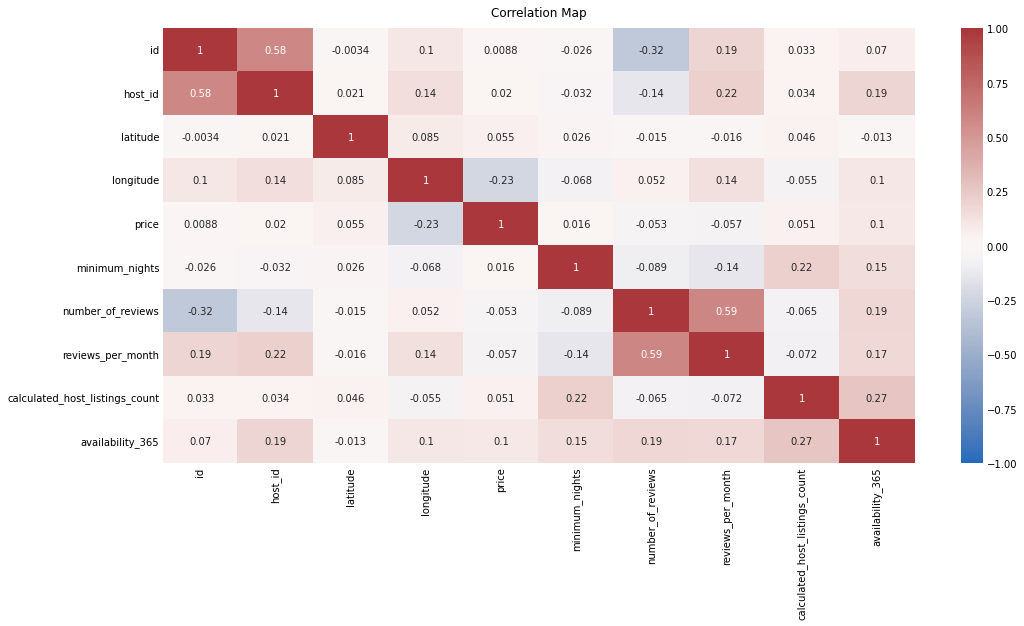

In [553]:
# Correlation matrix to understand relation between variables

plt.figure(figsize=(15, 8))
sns.heatmap(nyc_df.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') # cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12);

There does not appear to be any significant correlation between variables

## Neighbourhood 

In [554]:
nyc_df['neighbourhood'].describe()

count            47926
unique             221
top       Williamsburg
freq              3910
Name: neighbourhood, dtype: object

There are <b>221</b> neighbourhoods with <b>Williamsburg</b> having the most listings (3910). 

### Top 10 Neighbourhoods with the Most Listings

In [555]:
nyc_df['neighbourhood'].value_counts().head(10)

Williamsburg          3910
Bedford-Stuyvesant    3704
Harlem                2635
Bushwick              2451
Upper West Side       1934
Hell's Kitchen        1883
East Village          1832
Upper East Side       1766
Crown Heights         1560
Midtown               1489
Name: neighbourhood, dtype: int64

In [556]:
#Calulating the total number of listings that the top 10 neighbourhoods account for
nyc_df['neighbourhood'].value_counts().head(10).sum()

23164

In [557]:
round((23427/48858)*100,2)

47.95

The top 10 neighbourhoods represent about <b>47.95%</b> of all listings.

## Neighbourhood Groups

In [558]:
#Identifying unique neighbourhoods
nyc_df['neighbourhood_group'].describe()

count         47926
unique            5
top       Manhattan
freq          20852
Name: neighbourhood_group, dtype: object

There are <b>5</b> neighbourhood groups with <b>Manhattan</b> having the most listings (20852). 

### Number of Listings in Each Neighbourhood Group

In [559]:
nyc_df['neighbourhood_group'].value_counts()

Manhattan        20852
Brooklyn         20041
Queens            5574
Bronx             1087
Staten Island      372
Name: neighbourhood_group, dtype: int64

Text(0.5, 1.0, 'neighbourhood group')

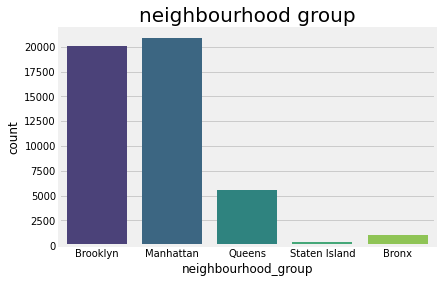

In [560]:
sns.countplot(x='neighbourhood_group',data=nyc_df,palette='viridis')
plt.title("neighbourhood group",fontsize=20)

## Room Type

In [561]:
#Identifying number of rooms of each time
nyc_df['room_type'].value_counts()

Entire home/apt    24614
Private room       22156
Shared room         1156
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Number of Rooms of Each Type')

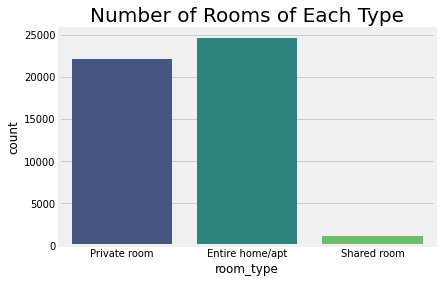

In [562]:
sns.countplot(x='room_type',data=nyc_df,palette='viridis')
plt.title("Number of Rooms of Each Type",fontsize=20)

The majority of the listings are Entire home/apts or Private rooms.

## Month

Text(0.5, 1.0, 'Airbnb Listings Each Month')

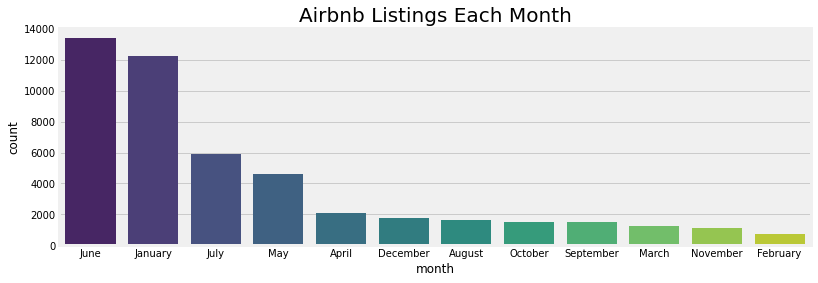

In [563]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

# We use order = nyc_df['Month'].value_counts().index to help us sort the count plot by the value counts

sns.countplot(x='month',data=nyc_df,order = nyc_df['month'].value_counts().index,palette='viridis')
plt.title("Airbnb Listings Each Month",fontsize=20)

- The majority of reviews are left in the month of <b>June</b> which indicates that the majority of customers used a rental in June. 
- Meanwhile, the least reviews are left in <b>February</b>, which indicates that the fewest of customers used a rental in February.

## Availability

In [564]:
nyc_df['availability_365'].mean()

109.87985644535325

On average, any given listing is available <b>110 days</b> in a year.

In [565]:
# Identifying the average availability for each neighbourhood group (rounded to 2 decimal places)
nbhd_group = nyc_df.groupby('neighbourhood_group')['availability_365'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd_group = nbhd_group.to_frame()

#Renaming columns
nbhd_group.rename(columns={'availability_365': 'average_availability'}, inplace=True)

# Identifying the average price for each neighbourhood group (rounded to 2 decimal places)
nbhd_group['average_price'] = nyc_df.groupby('neighbourhood_group')['price'].mean().round()

# Identifying the average number of reviews per listing for each neighbourhood group (rounded to 2 decimal places)
nbhd_group['average_number_of_reviews_per_listing'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].mean().round()

# Identifying the total number of reviews for each neighbourhood group(rounded to 2 decimal places)
nbhd_group['total_number_of_reviews'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

nbhd_group.sort_values(by=['average_availability'])

average_availability  ...  total_number_of_reviews
neighbourhood_group                        ...                         
Brooklyn                           100.03  ...                   485731
Manhattan                          105.82  ...                   449942
Queens                             143.61  ...                   154555
Bronx                              165.73  ...                    28279
Staten Island                      199.29  ...                    11541

[5 rows x 4 columns]

On average, 
- Listings in <b>Staten Island</b> have the greatest availability and receive the most reviews per listing. 
    - However, Staten Island also receives the least number of reviews overall.
- Listings in <b>Brooklyn</b> have the least availability and receive the second least reviews per listing. 
    - However, Brooklyn receives the highest number of reviews overall.

### Duration of Stay

In [566]:
nyc_df['minimum_nights'].mean()

6.522075700037558

Average duration of stay for all listings is <b>7 days.</b>

In [567]:
nyc_df.groupby('neighbourhood')['minimum_nights'].mean().sort_values()

neighbourhood
Breezy Point                   1.000000
New Dorp                       1.000000
Oakwood                        1.200000
East Morrisania                1.333333
Woodlawn                       1.454545
                                ...    
Bay Terrace, Staten Island    16.500000
Vinegar Hill                  18.352941
Olinville                     23.500000
North Riverdale               41.400000
Spuyten Duyvil                48.250000
Name: minimum_nights, Length: 221, dtype: float64

Listings in the <b>Spuyten Duyvil</b> neighbourhood offer the longest average duration of stay at approximately <b>48 days.</b>

In [568]:
nyc_df.groupby('neighbourhood_group')['minimum_nights'].mean()

neighbourhood_group
Bronx            4.569457
Brooklyn         5.868470
Manhattan        7.818627
Queens           4.514711
Staten Island    4.841398
Name: minimum_nights, dtype: float64

Listings in the <b>Manhattan</b> neighbourhood group offer the longest average duration of stay at approximately <b>8 days.</b>

## Price

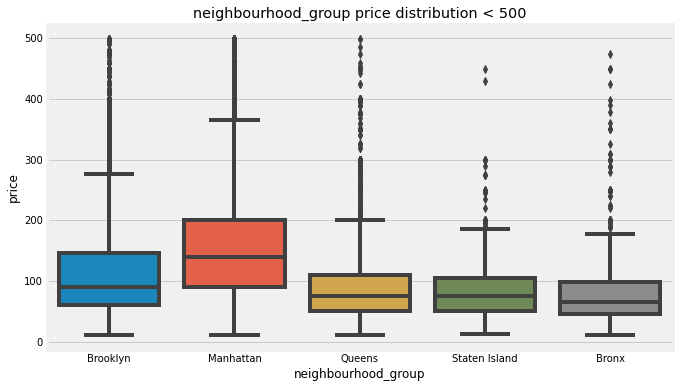

In [569]:
#plt.style.use('fivethirtyeight')
ng = nyc_df[nyc_df.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

### Average Price Across all listings

In [570]:
avg_all_listings = round(nyc_df['price'].mean(),2)
avg_all_listings

142.77

Average listing price accross all listings is <b>$142.77.</b>

### Price and Reviews Per Month

Text(0.5, 1.0, 'Reviews per Month vs. Price')

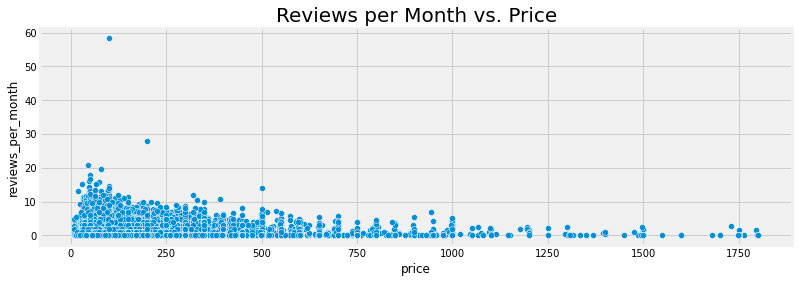

In [571]:
afig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='reviews_per_month',x='price', data=nyc_df)
plt.title("Reviews per Month vs. Price",fontsize=20)

Text(0.5, 1.0, 'Number of Reviews vs. Price')

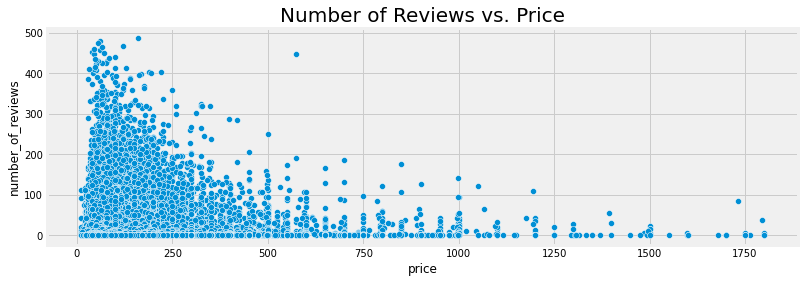

In [572]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='number_of_reviews',x='price', data=nyc_df)
plt.title("Number of Reviews vs. Price",fontsize=20)

Based on the plot we can see that the majority of more expensive listings receive fewers reviews as compared to less expensive ones. 

### Average Price by Neighbourhood

In [573]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
nbhd = nyc_df.groupby('neighbourhood')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd = nbhd.to_frame()

#Renaming columns
nbhd.rename(columns={'price': 'average_price'}, inplace=True)

# Identifying the average number of reviews for each neighbourhood (rounded to 2 decimal places)
nbhd['average_number_of_reviews'] = nyc_df.groupby('neighbourhood')['number_of_reviews'].mean().round()

nbhd.head()

average_price  average_number_of_reviews
neighbourhood                                          
Allerton               87.60                       43.0
Arden Heights          67.25                        8.0
Arrochar              115.00                       15.0
Arverne               171.78                       29.0
Astoria               104.65                       22.0

Text(0.5, 1.0, 'Number of Reviews vs. Price: Aggregated by Neighbourhood')

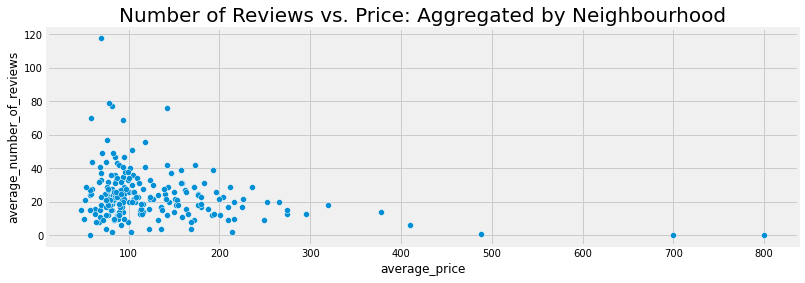

In [574]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='average_number_of_reviews',x='average_price', data=nbhd)
plt.title("Number of Reviews vs. Price: Aggregated by Neighbourhood",fontsize=20)

We see that once the data is aggregated by neighbourhood averages, there is still a larger number of reviews left for the less expensive listings as compared to the more expensive ones.

### Neighbourhoods with Listings Above Average Price

In [575]:
nbhd[nbhd['average_price']>avg_all_listings].count()

average_price                60
average_number_of_reviews    60
dtype: int64

There are <b>60</b> neighbourhoods with average listing price above the average for all listings.

### Neighbourhoods with Listings Below Average Price

In [576]:
nbhd[nbhd['average_price']<avg_all_listings].count()

average_price                161
average_number_of_reviews    161
dtype: int64

There are <b>161</b> neighbourhoods with average listing price below the average for all listings.

### Price in Each Neighbourhood Group

In [577]:
nyc_df.groupby('neighbourhood_group')['price'].std()

neighbourhood_group
Bronx             77.820285
Brooklyn         106.721651
Manhattan        153.319790
Queens            86.095967
Staten Island    113.055778
Name: price, dtype: float64

Largest standard deviation in price is in <b>Manhattan</b>.

Text(0.5, 1.0, 'Listing Price by Neighbourhood Group')

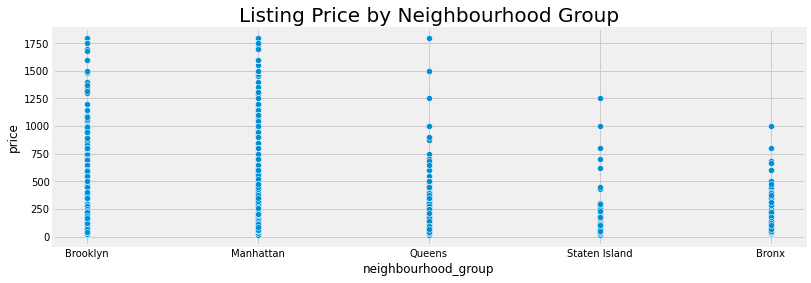

In [578]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

sns.scatterplot(y='price',x='neighbourhood_group', data=nyc_df)
plt.title("Listing Price by Neighbourhood Group",fontsize=20)

The spread of prices is greatest in <b>Manhattan.</b>

### Average Price, Total Number of Reviews and Number of Listings by Neighbourhood Group

In [579]:
# Identifying the average listing price for each neighbourhood (rounded to 2 decimal places)
nbhd_group = nyc_df.groupby('neighbourhood_group')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
nbhd_group = nbhd_group.to_frame()

#Renaming columns
nbhd_group.rename(columns={'price': 'average_price'}, inplace=True)

# Identifying the average number of reviews for each neighbourhood group(rounded to 2 decimal places)
nbhd_group['total_number_of_reviews'] = nyc_df.groupby('neighbourhood_group')['number_of_reviews'].sum().round(2)

nbhd_group['number_of_listings'] = nyc_df['neighbourhood_group'].value_counts()

#Ratio of reviews as compared to total number of listings for each neighbourhood group
nbhd_group['ratio'] = (nbhd_group['total_number_of_reviews']/nbhd_group['number_of_listings']).round(2)


nbhd_group.head()

average_price  ...  ratio
neighbourhood_group                 ...       
Bronx                        85.33  ...  26.02
Brooklyn                    119.76  ...  24.24
Manhattan                   180.83  ...  21.58
Queens                       97.03  ...  27.73
Staten Island               101.68  ...  31.02

[5 rows x 4 columns]

We notice something interesting in the data here:

- Staten island has the largest number of reviews as compared to the actual number of listings, which indicates that reviews were left more frequently for stays in listings that were within the Staten island neighbourhood group.
- Manhattan has the second largest number of listings but has the least number of reviews compared to the actual number of listings, which indicates that reviews are left less frequently for stays in the Manhattan neighbourhood group. The possible reasons for this are as follows:

    - The average listing price is also the highest of all neighbourhood groups.
    - Manhattan's average listing price is also above the average for all listings.


### Average Price by Room Type

In [580]:
room_type = nyc_df.groupby('room_type')['price'].mean().round(2)

#Converting the series nbhd to a dataframe
room_type = room_type.to_frame()

#Renaming columns
room_type.rename(columns={'price': 'average_price'}, inplace=True)

# Identifying the average number of reviews for each neighbourhood (rounded to 2 decimal places)
room_type['total_number_of_reviews'] = nyc_df.groupby('room_type')['number_of_reviews'].sum().round()

room_type

average_price  total_number_of_reviews
room_type                                              
Entire home/apt         196.94                   578025
Private room             86.37                   532774
Shared room              70.16                    19249

As expected, listings with Entire home/apt are the most expensive.

### Number of Reviews vs. Price for Each Room Type

Text(0.5, 0.98, 'Number of Reviews vs. Price for Each Room Type')

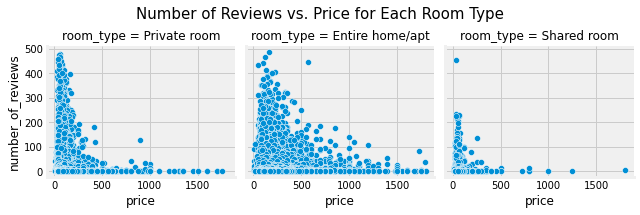

In [581]:
# Form a facetgrid using columns with a hue
graph = sns.FacetGrid(nyc_df, col ='room_type')

# map the above form facetgrid with some attributes
graph.map(sns.scatterplot, "price","number_of_reviews")

#Setting the title for the FacetGrid 
graph.fig.subplots_adjust(top=0.8)
graph.fig.suptitle('Number of Reviews vs. Price for Each Room Type', fontsize=15)

There are more reviews for less expensive listings regardless of the room types.

# Summary of Data

#### Availability
- There are 48858 listings in total.
- The majority of the listings are Entire home/apts or Private rooms.

- On average, any given listing is available <b>110 days</b> in a year.
    - Listings in <b>Staten Island</b> have the greatest availability and receive the most reviews per listing. 
    - However, Staten Island also receives the least number of reviews overall.
    - Listings in <b>Broklyn</b> have the least availability and receive the second least reviews per listing. 
    - However, Broklyn receives the highest number of reviews overall.
    
- Average duration of stay for all listings is 7 days.
    - Listings in the <b>Spuyten Duyvil</b> neighbourhood offer the longest average duration of stay at approximately <b>48 days.</b>
    - Listings in the <b>Manhattan</b> neighbourhood group offer the longest average duration of stay at approximately <b>8 days.</b>

#### Price 

- Average Price Across all listings: 142.77
- There are <b>60</b> neighbourhoods with average listing price above the average for all listings.
- There are <b>161</b> neighbourhoods with average listing price below the average for all listings.
- Largest standard deviation in price is in <b>Manhattan</b>.
- The spread of prices is greatest in <b>Manhattan.</b>
- As expected, listings with Entire home/apt are the most expensive.

#### Number of Reviews

- Across all categories (Room Type, Neighbourhood etc.), less expensive Listings receive more reviews. 
- The majority of reviews are left in the month of <b>June</b> which indicates that the majority of customers used a rental in June. Meanwhile, the least reviews are left in <b>February</b>, which indicates that the  fewest customers used a rental in February.
- Staten Island has the largest number of reviews as compared to the actual number of listings, which indicates that reviews were left more frequently for stays in listings that were within the Staten island neighbourhood group.
- Manhattan has the second largest number of listings but has the least number of reviews compared to the actual number of listings, which indicates that reviews are left less frequently for stays in the Manhattan neighbourhood group. The possible reasons for this are as follows:

    - The average listing price is also the highest of all neighbourhood groups.
    - Manhattan's average listing price is also above the average for all listings.

<b>Additional Data necessary</b><br>
The data only tells us if a review was left or not for any given listing. It would be beneficial to know what score each listing received when they were reviewed. We can only go off the number of reviews listings receive and assume listings (and by extension neighbourhoods and neighbourhood groups) with more reviews are preferable.

# Model Built

In [582]:
'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [583]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(nyc_df['neighbourhood_group'])
nyc_df['neighbourhood_group']=le.transform(nyc_df['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(nyc_df['neighbourhood'])
nyc_df['neighbourhood']=le.transform(nyc_df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(nyc_df['room_type'])
nyc_df['room_type']=le.transform(nyc_df['room_type'])

le = preprocessing.LabelEncoder()
le.fit(nyc_df['month'])
nyc_df['month']=le.transform(nyc_df['month'])

nyc_df.sort_values(by='price',ascending=True,inplace=True)

nyc_df.head()

id  ... month
21671  17437106  ...     4
47181  35642891  ...     6
23227  18835820  ...    10
32774  25839759  ...    10
22258  17979764  ...     0

[5 rows x 17 columns]

# Model Evaluation

## Linear Regression

In [584]:
'''Train LRM'''
lm = LinearRegression()

X = nyc_df.drop(columns=['id','name','host_name','price','last_review'])
y = nyc_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [585]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 109.97795984702641
        R2 Score: 23.878112808399965
        Mean Absolute Error: 61.30978951785289
     


### Actual Vs Predicted for Linear Model

In [586]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0             50         79.082100
1             97        171.236896
2            153        191.908487
3             75         44.631087
4             85         82.738110

### Predicted Vs Actual Plot

In [587]:
import plotly.graph_objects as go

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

### Linear Regression Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



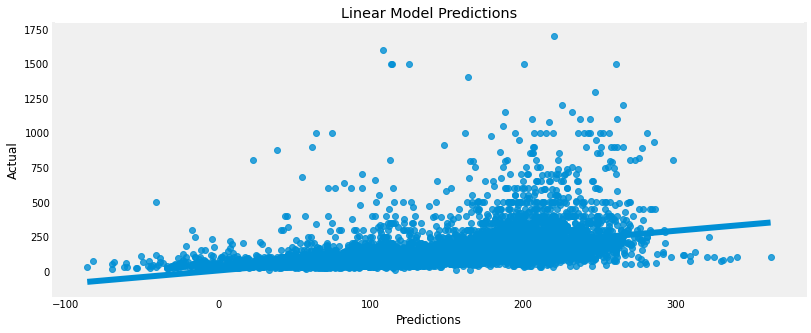

In [596]:
plt.figure(figsize=(12,5))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

## Gradient Boosted Regressor Model

In [589]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [590]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 100.87934635191183
        R2 Score: 35.95241662051553
        Mean Absolute Error: 52.812809035756025
     


### Actual Vs Predicted for Linear Model

In [591]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0             50         76.532129
1             97        198.808532
2            153        168.084148
3             75         53.552259
4             85        108.504028

### Predicted Vs Actual Plot

In [592]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

### Gradient Boosted Regressor Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



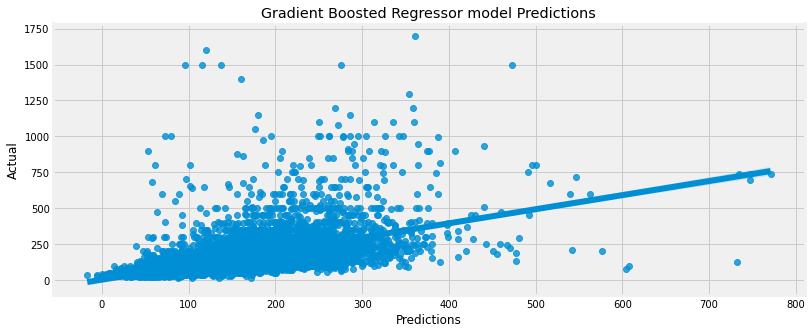

In [597]:
plt.figure(figsize=(12,5))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()